<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/ejercicios/Ejercicios_2_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

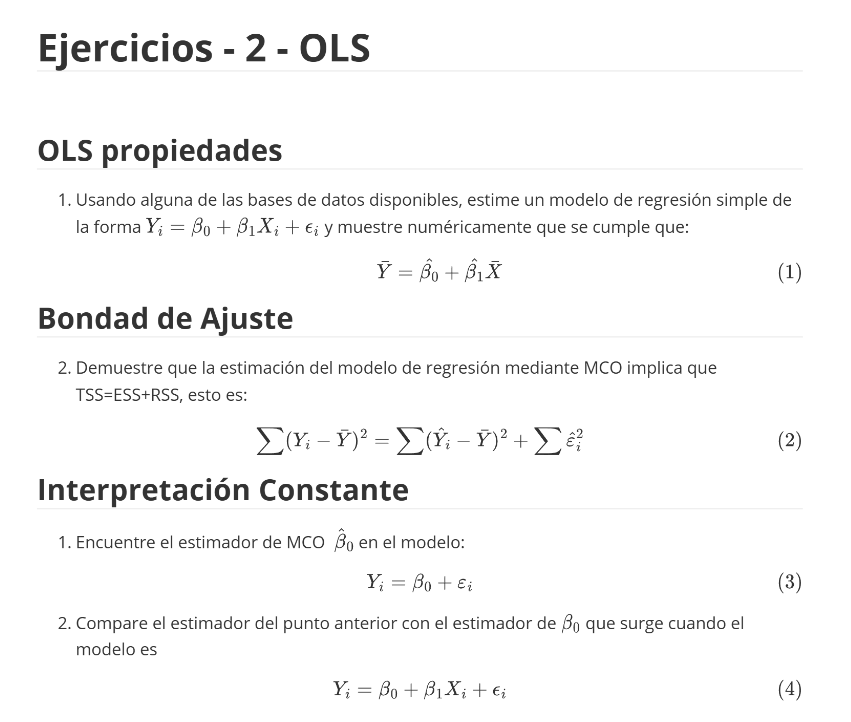

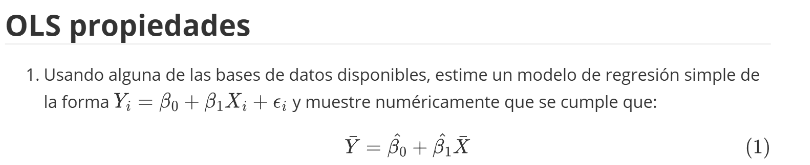

In [3]:
import pandas as pd
import statsmodels.api as sm

In [4]:
# Cargar la base
df=pd.read_excel('https://github.com/rpasquini/econometria/blob/main/datos/listings_26_dic_2023.xlsx?raw=True', sheet_name='listings', engine='openpyxl')


In [5]:
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [7]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [8]:
regress(['price','beds'], df)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.340
Date:                Mon, 14 Apr 2025   Prob (F-statistic):            0.00225
Time:                        19:39:09   Log-Likelihood:            -3.2988e+05
No. Observations:               22169   AIC:                         6.598e+05
Df Residuals:                   22167   BIC:                         6.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.045e+04   7620.415      5.309      0.0

In [9]:
modelo1 = regress(['price','beds'], df)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.340
Date:                Mon, 14 Apr 2025   Prob (F-statistic):            0.00225
Time:                        19:39:09   Log-Likelihood:            -3.2988e+05
No. Observations:               22169   AIC:                         6.598e+05
Df Residuals:                   22167   BIC:                         6.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.045e+04   7620.415      5.309      0.0

In [28]:
b0 = modelo1.params['const']
b1 = modelo1.params['beds']

print(f"Intercept: {b0}")
print(f"Beds Coefficient: {b1}")


Intercept: 40453.89517079807
Beds Coefficient: 9551.169937819552


In [29]:
x_barra = df['beds'].mean()
print(x_barra)

1.9122064088011874


Ahora evaluamos el modelo en Xbarra (el promedio de beds)

In [30]:
Y_barra = b0 + b1 * x_barra
print(Y_barra)

58717.70353744585


In [31]:
df['price'].mean()

np.float64(58203.77380169276)

Como vemos, da aproximadamente lo mismo,

In [32]:
# Verificar que el promedio de los residuos es aproximadamente 0
residuos = modelo1.resid
print("Promedio de residuos:", residuos.mean())

Promedio de residuos: 1.4014579407809267e-10




---




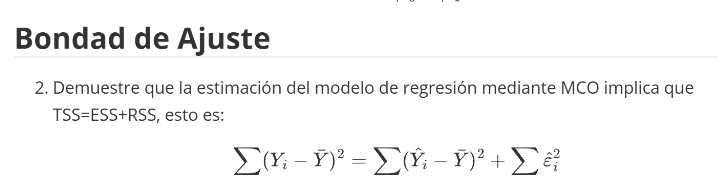
---



$TSS = \sum (Y_i - \bar Y)^2$

Sabemos que

$y_i = \hat y + \hat u$ por ende reemplazamos


$TSS = \sum ((\hat y + \hat u) - \bar Y)^2$

Reordenamos para que nos quede el residuo despejado

$TSS = \sum ((\hat y - \bar Y) + \hat u )^2$

Resolvemos el cuadrado

$TSS = \sum ((\hat y - \bar Y)^2 + 2(\hat y - \bar Y)\hat u+ (\hat u)^2 )$

Distribuimos la sumatoria

$TSS = \sum (\hat y - \bar Y)^2 + 2\sum(\hat y - \bar Y)\hat u+ \sum\hat u^2$

El término cruzado está multiplicado por la sumatoria de los residuos, que por propiedad sabemos que es 0, por ende, multiplicar por 0 devuelve 0.

Nos quedan sólo los otros dos términos.

$TSS = \sum (\hat y - \bar Y)^2 + \sum\hat u^2 $

Y estos dos términos son ESS + RSS

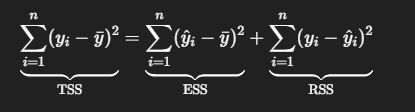







---


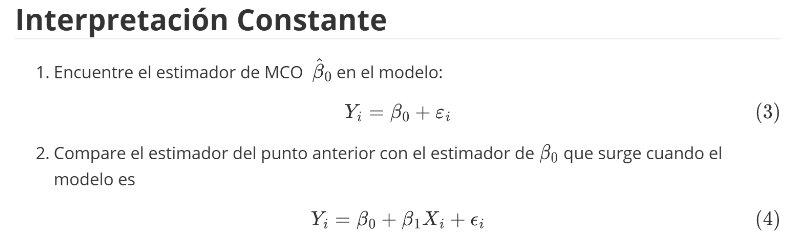

El primer modelo es una regresión sin variable explicativa (solo con constante).

El segundo modelo es la regresión usual con constante y pendiente.

Modelo 1: Solo constante

Este modelo simplemente estima el valor promedio de la variable dependiente:

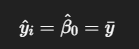

¿Por qué? Porque minimizamos la suma de cuadrados
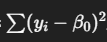
 , y su mínimo se alcanza en el promedio de
𝑦.




In [ ]:
import pandas as pd
import statsmodels.formula.api as smf


# Modelo solo con constante
modelo_1 = smf.ols('price ~ 1', data=df).fit()
print(modelo_1.summary())

In [ ]:
df['price'].mean()

Modelo 2: Regresión simple

El modelo dos es lo mismo que hicimos antes:
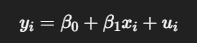



In [ ]:
regress(['price','beds'], df)

Comparación conceptual

En el modelo 1, la constante es simplemente el promedio de price.

En el modelo 2, la constante es el valor esperado de price cuando rooms = 0, lo cual puede o no tener sentido económico según el contexto.

Entonces, la diferencia en el β0 entre ambos modelos se debe a que en el segundo caso la constante ajusta el intercepto según la pendiente de rooms, mientras que en el primero no hay pendiente que condicione.